In [1]:
import pandas as pd
chunksize = 10000

In [3]:
DrDoS_DNS = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_DNS.csv', chunksize=chunksize)
DrDoS_LDAP = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_LDAP.csv', chunksize=chunksize)
DrDoS_MSSQL = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_MSSQL.csv', chunksize=chunksize)
DrDoS_NetBIOS = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_NetBIOS.csv', chunksize=chunksize)
DrDoS_NTP = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_NTP.csv', chunksize=chunksize)
DrDoS_SNMP = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_SNMP.csv', chunksize=chunksize)
DrDoS_SSDP = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_SSDP.csv', chunksize=chunksize)
DrDoS_UDP = pd.read_csv('../../../CSV-01-12/01-12/DrDoS_UDP.csv', chunksize=chunksize)
Syn = pd.read_csv('../../../CSV-01-12/01-12/Syn.csv', chunksize=chunksize)
TFTP = pd.read_csv('../../../CSV-01-12/01-12/TFTP.csv', chunksize=chunksize)
UDPLag = pd.read_csv('../../../CSV-01-12/01-12/UDPLag.csv', chunksize=chunksize)
csv_list = [DrDoS_DNS, DrDoS_LDAP, DrDoS_MSSQL, DrDoS_NetBIOS, DrDoS_NTP, DrDoS_SNMP, DrDoS_SSDP, DrDoS_UDP, Syn, TFTP, UDPLag] # csv file list
csv_label_name = ['LDAP', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'TFTP', 'UDP-lag'] # name of each csv file

In [8]:
benign_num = [] # number of benign packet in each csv file
ddos_num = [] # number of ddos packet in each csv file
other_num = [] # number of other packet in each csv file, it should be zero

csv_name_index = 0 # index
for csv in csv_list: # retrieve all csv file
    benign = 0 # count for benign packet
    ddos = 0
    other = 0
    current_csv_name = csv_label_name[csv_name_index]
    csv_name_index += 1
    for df in csv:
        for i in range(0, df.shape[0]):
            current_label = df[' Label'].iloc[i] # column name has one space in the front
            if current_label == 'BENIGN':
                benign += 1
            elif current_label == current_csv_name:
                ddos += 1
            else:
                other += 1
    benign_num.append(benign)
    ddos_num.append(ddos)
    other_num.append(other)

/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in csv:
/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in csv:
/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in csv:
/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in csv:
/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in csv:
/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for df in csv:
/tmp/ipykernel_5447/1391831718.py:12: DtypeWarning: Columns (85)

[3402, 1612, 2006, 1707, 14365, 1507, 763, 2157, 392, 25247, 3705]
[5071011, 2179930, 4522492, 4093279, 1202642, 5159870, 2610611, 3134645, 1582289, 20082580, 366461]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439]


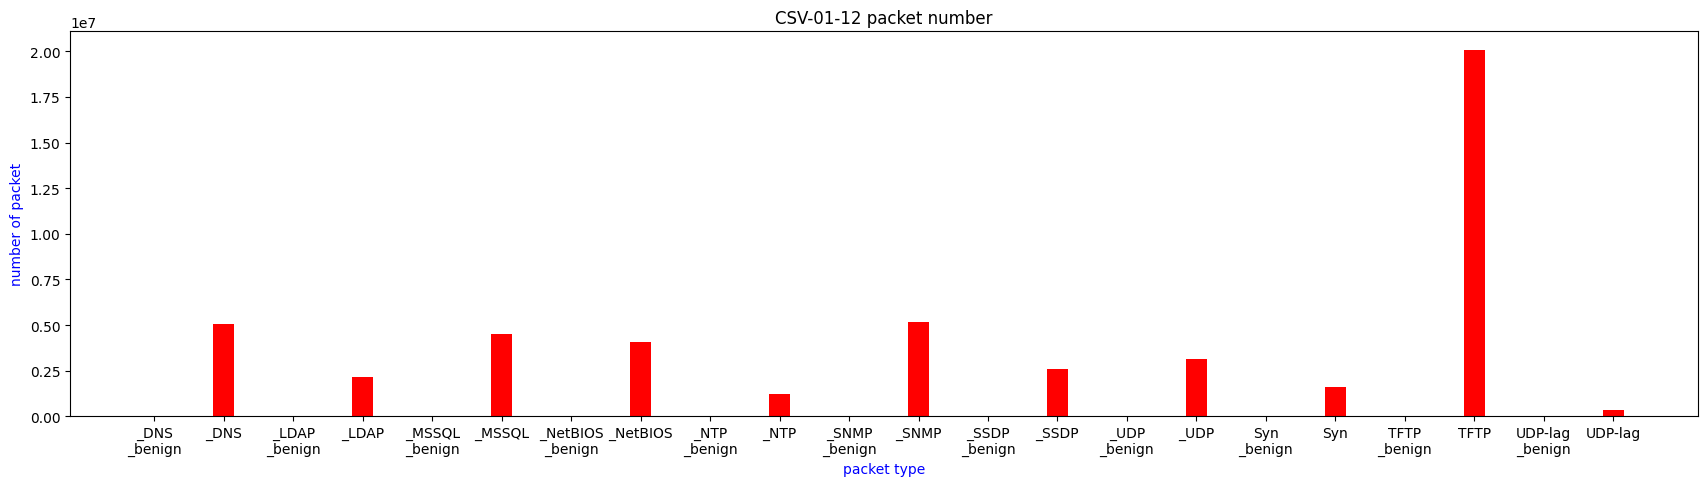

In [92]:
import matplotlib.pyplot as plt

x_name = [] 
color = []
for i in csv_label_name:
    i_benign = i + '\n_benign'
    if i[0:5] == 'DrDoS':
        x_name.extend((i_benign[5:], i[5:]))
    else:
        x_name.extend((i_benign, i))
    color.extend(('blue', 'red'))

y_value = []
for i in range(0, len(benign_num)):
    y_value.extend((benign_num[i], ddos_num[i]))

plt.figure(figsize=(21, 5), dpi=100) # set figuer size
plt.bar(x_name, y_value, color=color, width=0.3) 
plt.title("CSV-01-12 packet number")
plt.xlabel("packet type", color='blue')
plt.ylabel("number of packet", color='blue')
plt.xticks(fontsize=10) # set font size
plt.show()

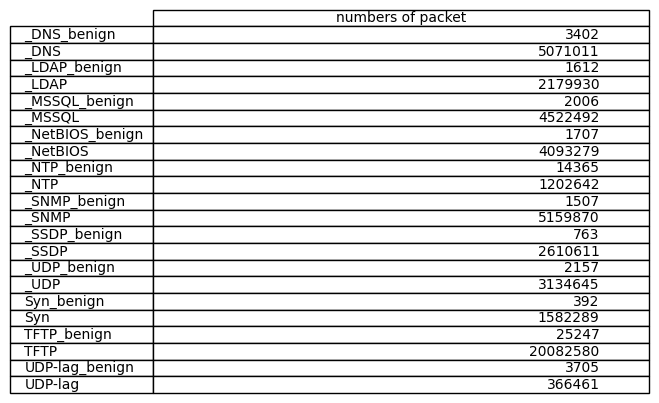

In [91]:
for i in range(len(x_name)): # handle '\n' in stringg
    if len(x_name[i].split('\n')) == 2:
        x_name[i] = x_name[i].split('\n')[0] + x_name[i].split('\n')[1]

# https://ithelp.ithome.com.tw/articles/10231378
table_pd = pd.DataFrame(y_value, index = x_name, columns=["numbers of packet"]) 
plt.figure('2')            
ax = plt.axes(frame_on=False)
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
pd.plotting.table(ax, table_pd, loc='center') #將mytable投射到ax上，且放置於ax的中間